## Intro

Blah, blah, blah, blah, BIAS. 
Blah, blah, blah, blah, VARIANCE. 
Blah, blah, OMG, TRADEOFF!! - Tom France

Looks like that masters degree is really paying off! - Stephen

$$E[(y - \hat{f})^2] = \sigma^2 + Var[\hat{f}] + Bias[\hat{f}]^2$$
$$Bias[\hat{f}] = E[\hat{f} - f]$$
$$Var[\hat{f}] = E[\hat{f}^2] - E[\hat{f}]^2$$

In [3]:
import math
from sklearn import cross_validation, linear_model
from sklearn.cross_validation import train_test_split
from pylab import *
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

xmin = -math.pi
xmax = math.pi
ymin = -2
ymax = 2
seedMap = [123, 232, 13, 100, 344, 45, 71, 99, 199, 80]
numberOfTrainingSets = seedMap.__len__()
polynomialDegrees = [1, 2, 3, 10, 15]
dataPointsPerTrainingSet = 50
testSplit = 0.2

In [4]:
# generate noisy data from an underlying function
def createSineData(n, seed):
    random.seed(seed) # for reproducibility
    x = pd.Series([random.uniform(-math.pi, math.pi) for i in range(n)])
    f = np.vectorize(lambda x: math.sin(x)) # our true function
    y = x.apply(f) # generate our labels/outputs
    e = pd.Series([random.gauss(0,1.0/3.0) for i in range(n)]) # add some noise
    y = y + e
    return np.stack((x, y), axis=-1)

# Calculate Training MSE
def training_MSE_ByComplexity(dataSetTrain, solutionSet):
      avgMSE = {}
      for i in range(numberOfTrainingSets):
            x = dataSetTrain[i]['x']
            y = dataSetTrain[i]['y']
            avgMSE[i] = {}
            for s in range(polynomialDegrees.__len__()):
                  avgMSE[i][s] = np.mean((np.polyval(solutionSet[i][s], x) - y) ** 2)

      return avgMSE

def transformArray(array, len):
      transformedArray = {}
      for i in range(len):
            transformedArray[i] = {}
            for j in range(numberOfTrainingSets):
                  transformedArray[i][j] = array[j][i]
      return transformedArray
#For a given solution, average squared error across all datasets
def training_MSE_toPlot(xpoints, solutionSet, solutionIndex):
      meanSquaredError = {}
      result = {}
      len = xpoints.__len__()
      x = pd.Series(xpoints)
      f = np.vectorize(lambda x: math.sin(x))
      y = x.apply(f)
      for i in range(numberOfTrainingSets):
            yhat = solutions[index][solutionIndex](xpoints)
            meanSquaredError[i]= (yhat - y) ** 2
      transformedMeanSquareError = transformArray(meanSquaredError, len)
      for row in range(len):
            sum = 0
            for column in range(numberOfTrainingSets):
                  sum = sum + transformedMeanSquareError[row][column]
            result[row] = sum/numberOfTrainingSets
      return result

def avgFittedFunction(solutionSet):
      avgEstimators = {}
      for s in range(polynomialDegrees.__len__()):
            sumEst = 0
            for i in range(numberOfTrainingSets):
                  sumEst = sumEst + solutionSet[i][s]
            avgEstimators[s] = sumEst / numberOfTrainingSets
      return avgEstimators

def solutionBias_ByComplexity(dataSetTest, solutionSet):
      solutionBias = {}
      avgEstimators = avgFittedFunction(solutionSet)
      for s in range(polynomialDegrees.__len__()):
            solutionBiasPerDataSet = []
            x = pd.Series([random.uniform(-math.pi, math.pi) for i in range(dataPointsPerTrainingSet)])
            f = np.vectorize(lambda x: math.sin(x))  # our true function
            y = x.apply(f)
            solutionBias[s] = np.mean(np.polyval(avgEstimators[s], x)-y)
      return solutionBias

dataSetsTrain = {}
dataSetsTest = {}
for i in range(numberOfTrainingSets):
      dataSetsTrain[i] = {}
      dataSetsTest[i] = {}
      ds = createSineData(dataPointsPerTrainingSet, seedMap[i])
      train, test = train_test_split(ds, test_size=testSplit)
      dataSetsTrain[i]['x'] = train[:,0]
      dataSetsTrain[i]['y'] = train[:,1]
      dataSetsTest[i]['x'] = test[:,0]
      dataSetsTest[i]['y'] = test[:,1]

#Train solutions for each training data set across several degrees of polynomial complexity
solutions = {}
for x in range(numberOfTrainingSets):
      solutions[x]={}
      for s in range(polynomialDegrees.__len__()):
            x1 = dataSetsTrain[x]['x']
            y1 = dataSetsTrain[x]['y']
            func = np.polyfit(x1, y1, polynomialDegrees[s])
            solutions[x][s] = poly1d(func)

## One of our data sets

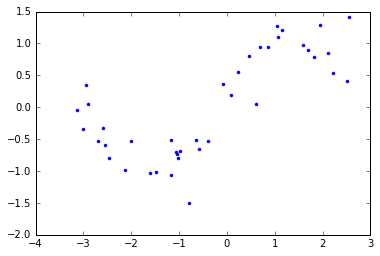

In [5]:
index = 0
x = dataSetsTrain[index]['x']
y = dataSetsTrain[index]['y']

_ = plt.plot(x, y, '.')

## Fitting a 0-degree Polynomial

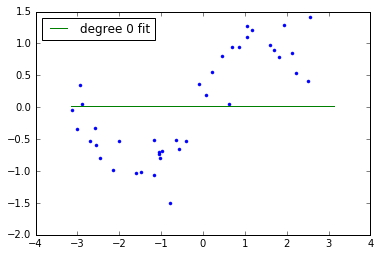

In [6]:
p0 = np.poly1d(np.polyfit(x, y, 0))
xpoints = np.linspace(-math.pi, math.pi, 100)
_ = plt.plot(x, y, '.')
_ = plt.plot(xpoints, p0(xpoints), '-', label = 'degree 0 fit')
_ = plt.legend(loc='upper left')

## Fitting a 1-degree Polynomial

Training MSE: 0.316486692581


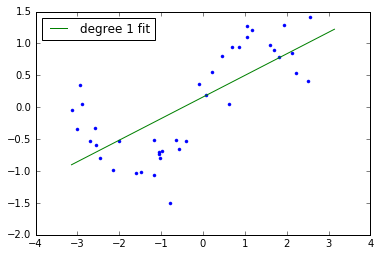

In [7]:
index = 0
solutionIndex = 0
p1 = solutions[index][solutionIndex]
xpoints = np.linspace(-math.pi, math.pi, 100)

_ = plt.plot(x, y, '.')
_ = plt.plot(xpoints, p1(xpoints), '-', label = 'degree 1 fit')
_ = plt.legend(loc='upper left')

print("Training MSE: " + str(training_MSE_ByComplexity(dataSetsTrain, solutions)[index][solutionIndex]))

## Fitting a 3-degree Polynomial

Training MSE: 0.0963166934061


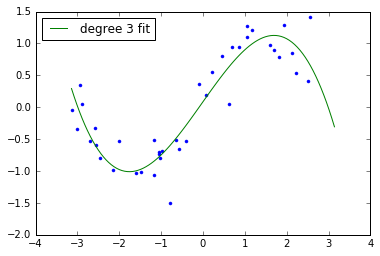

In [8]:
solutionIndex = 2
p3 = p1 = solutions[index][solutionIndex]

_ = plt.plot(x, y, '.')
_ = plt.plot(xpoints, p3(xpoints), '-', label = 'degree 3 fit')
_ = plt.legend(loc='upper left')
print("Training MSE: " + str(training_MSE_ByComplexity(dataSetsTrain, solutions)[index][solutionIndex]))

## Fitting a 10-degree Polynomial

Training MSE: 0.0710917535097


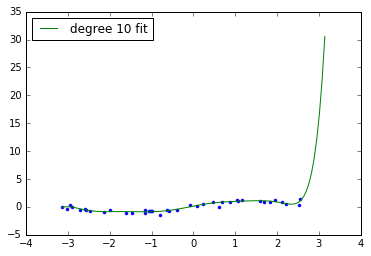

In [9]:
solutionIndex = 3
p10 = solutions[index][solutionIndex]

_ = plt.plot(x, y, '.')
_ = plt.plot(xpoints, p10(xpoints), '-', label = 'degree 10 fit')
_ = plt.legend(loc='upper left')
print("Training MSE: " + str(training_MSE_ByComplexity(dataSetsTrain, solutions)[index][solutionIndex]))

## Effect of sample size on model complexity

### Fitting a 18-degree Polynomial, n = 30

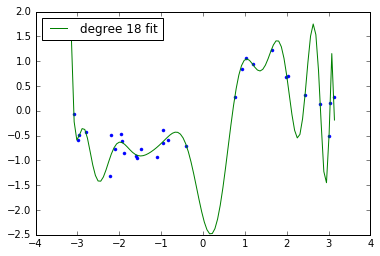

In [10]:
ds = createSineData(30, seedMap[6])
x = ds[:,0]
y = ds[:,1]
xpoints = np.linspace(-math.pi, math.pi, 100)

p6 = np.poly1d(np.polyfit(x, y, 18))
_ = plt.plot(x, y, '.')
_ = plt.plot(xpoints, p6(xpoints), '-', label = 'degree 18 fit')
_ = plt.legend(loc='upper left')

### Fitting a 18-degree Polynomial, n = 100

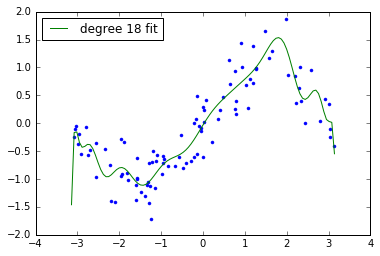

In [11]:
ds = createSineData(100, seedMap[6])
x = ds[:,0]
y = ds[:,1]
xpoints = np.linspace(-math.pi, math.pi, 100)

p18 = np.poly1d(np.polyfit(x, y, 18))
_ = plt.plot(x, y, '.')
_ = plt.plot(xpoints, p18(xpoints), '-', label = 'degree 18 fit')
_ = plt.legend(loc='upper left')

### Fitting a 18-degree Polynomial, n = 300

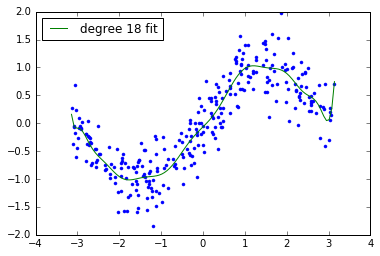

In [13]:
ds = createSineData(300, seedMap[6])
x = ds[:,0]
y = ds[:,1]
xpoints = np.linspace(-math.pi, math.pi, 100)

p18 = np.poly1d(np.polyfit(x, y, 18))
_ = plt.plot(x, y, '.')
_ = plt.plot(xpoints, p18(xpoints), '-', label = 'degree 18 fit')
_ = plt.legend(loc='upper left')

The extra data (evenly distributed) constrains the function